# Neural Network for Binary classification using TensorFlow

## Importing and exploring the dataset

In [2]:
%pip install ucimlrepo

In [3]:
# importing pandas module
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

data = pd.concat([X, y], axis=1)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
# printing info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Label Encoding

In [5]:
# importing the module
from sklearn import preprocessing

# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in multiple columns
data['job']= label_encoder.fit_transform(data['job'])
data['marital']= label_encoder.fit_transform(data['marital'])
data['education']= label_encoder.fit_transform(data['education'])
data['default']= label_encoder.fit_transform(data['default'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['housing']= label_encoder.fit_transform(data['housing'])
data['loan']= label_encoder.fit_transform(data['loan'])
data['contact']= label_encoder.fit_transform(data['contact'])
data['month']= label_encoder.fit_transform(data['month'])
data['poutcome']= label_encoder.fit_transform(data['poutcome'])
data['y']= label_encoder.fit_transform(data['y'])

## Bar plot

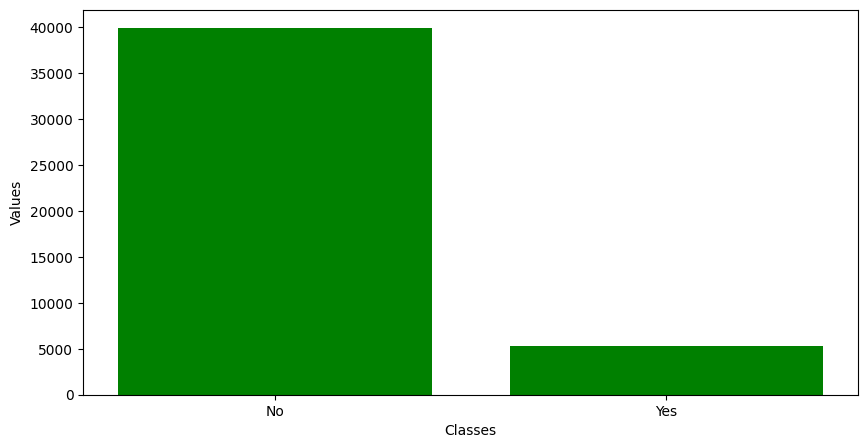

In [6]:
# importing matplotlib
import matplotlib.pyplot as plt
# plotting
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(['No',"Yes"], data.y.value_counts(), color ='green',
        width = 0.8)
# labeling
plt.xlabel("Classes")
plt.ylabel("Values")
plt.show()

## Splitting dataset

In [7]:
# splitting dataset
X = data.drop('y', axis=1)
y = data['y']

In [8]:
# importing the module
from sklearn.model_selection import train_test_split
# splitting into training data and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Building neural network model for binary classification using TensorFlow

In [13]:
# importing required module
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential
# defining neural network model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(input_shape=(16,)))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# adding output layer to neural network model
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
# compile the model with loss function binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7806 - loss: 41.0747
Epoch 2/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8588 - loss: 0.9141
Epoch 3/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8595 - loss: 0.8491
Epoch 4/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8616 - loss: 0.7787
Epoch 5/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8664 - loss: 0.6050
Epoch 6/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8667 - loss: 0.6873
Epoch 7/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8654 - loss: 0.6013
Epoch 8/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.4796
Epoch 9/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.4570
Epoch 10/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8658 - loss: 0.5593
Epoch 11/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8740 - loss: 0.4646
Epoch 12/50
989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

## Evaluating the trained model

In [16]:
# evaluate the model with test dataset
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8945 - loss: 0.3257
Test Accuracy: 0.8947213292121887


## Parameter tuning to find the optimum number of nodes and epochs

In [23]:
# importing the module
from tensorflow import keras

# function to create model
def model_builder(hp):

#     initializaing the classification model
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(16,)))
#     specifying the maximum and minimum nodes
    hp_units = hp.Int('units', min_value=5, max_value=100)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
#     comppiling the model with loss function binary crossentropy
    model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
#   return classification model
    return model

In [19]:
%pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [24]:
# importing the module
import keras_tuner as kt
import tensorflow as tf
# calling the function using hyperband
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
# early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
# initializing the tunner
tuner.search(X,y, epochs=100, validation_split=0.2, callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print("Optimin number of nodes in hidden layer are :", best_hps.get('units'))

Trial 83 Complete [00h 00m 07s]
val_accuracy: 0.6940174698829651

Best val_accuracy So Far: 0.7193409204483032
Total elapsed time: 00h 11m 17s
Optimin number of nodes in hidden layer are : 86


In [27]:
# creating model with optimimum parameters
model = tuner.hypermodel.build(best_hps)
# model training
history = model.fit(X, y, epochs=200, validation_split=0.2)
# fining the optimum epochs
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch value is: ' ,best_epoch)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 4.2639 - val_accuracy: 0.7057 - val_loss: 4.0964
Epoch 2/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9106 - loss: 1.0412 - val_accuracy: 0.6991 - val_loss: 2.0294
Epoch 3/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9049 - loss: 1.2762 - val_accuracy: 0.6889 - val_loss: 5.4976
Epoch 4/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9124 - loss: 1.0416 - val_accuracy: 0.7075 - val_loss: 3.8244
Epoch 5/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.8872 - val_accuracy: 0.7204 - val_loss: 1.5060
Epoch 6/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9163 - loss: 0.6796 - val_accuracy: 0.6866 - val_loss: 6.4570
Epoch 7/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9153 - loss: 0.8069 - val_accuracy: 0.7088 - val_loss: 3.7733
Epoch 8/200
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.7475 - val_

## Training the model with optimum parameters

In [29]:
# define model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(input_shape=(16,)))
# adding hidden layer with 10 nodes
model.add(Dense(86, activation='relu', kernel_initializer='he_normal'))
# adding output layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model trained
model.fit(X_train, y_train, epochs=8)

# evaluate the model with accuracy metrics
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7858 - loss: 23.0111
Epoch 2/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8428 - loss: 3.0548
Epoch 3/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8424 - loss: 2.2699
Epoch 4/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8432 - loss: 1.7110
Epoch 5/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 2.2228
Epoch 6/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8513 - loss: 2.3927
Epoch 7/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8476 - loss: 2.4944
Epoch 8/8
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8486 - loss: 2.0880
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8665 - loss: 0.9266
Test Accuracy: 0.8712769150733948


# Multiclass classification using TensorFlow

## Importing and exploring the dataset

In [30]:
# importing pandas module
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

data = pd.concat([X, y], axis=1)

data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
#info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [36]:
# creating labing encoding object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in multiple columns
data['Target']= label_encoder.fit_transform(data['Target'])

## Splitting the dataset

In [37]:
# dividing the dataset
X = data.drop('Target', axis=1)
y=data['Target']

In [38]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Building Neural Network for multiclass classification

In [46]:
# define model
model = Sequential()
# adding input layer with 36 nodes
model.add(InputLayer(input_shape=(36,)))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
# adding output layer
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [47]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1761 - loss: 1764.7898
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4018 - loss: 16.3981
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4369 - loss: 4.3471
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4672 - loss: 3.0019
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5224 - loss: 2.1036
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 1.7119
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 2.3043
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5823 - loss: 1.3694
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5685 - loss: 1.7396
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6109 - loss: 1.3199
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5764 - loss: 1.5990
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [48]:
# evaluate the model
evaluate = model.evaluate(X_test, y_test)
# printing evaluate accuracy
print('Test Accuracy:', evaluate[1])

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5937 - loss: 2.4192  
Test Accuracy: 0.6139240264892578
